In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('processed.csv')

# Parse dates if necessary and ensure the 'Date' column is of the datetime type
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)


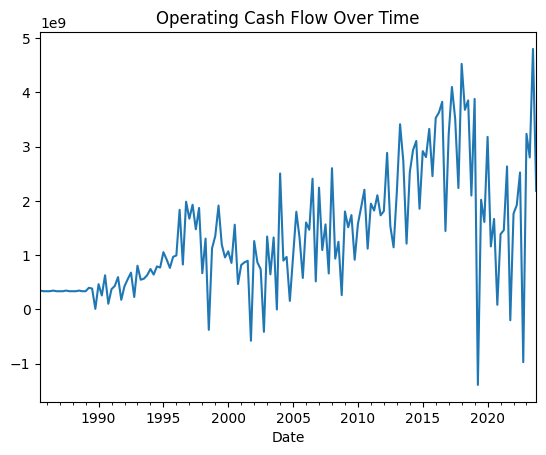

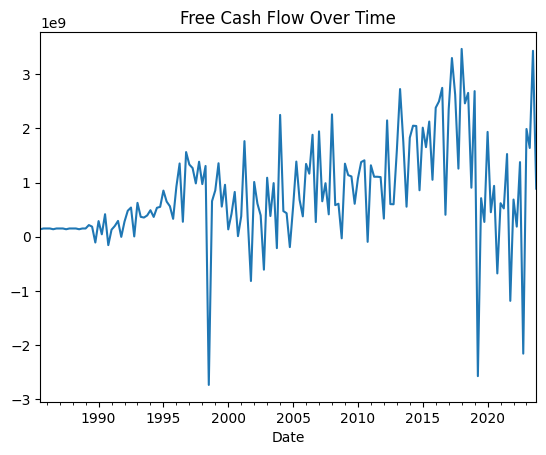

In [ ]:
import matplotlib.pyplot as plt

# Plot 'OperatingCashFlow' and 'FreeCashFlow'
data['OperatingCashFlow'].plot(title='Operating Cash Flow Over Time')
plt.show()

data['FreeCashFlow'].plot(title='Free Cash Flow Over Time')
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
adf_test_op = adfuller(data['OperatingCashFlow'])
adf_test_free = adfuller(data['FreeCashFlow'])

print(f'ADF Statistic for Operating Cash Flow: {adf_test_op[0]}')
print(f'ADF Statistic for Free Cash Flow: {adf_test_free[0]}')


ADF Statistic for Operating Cash Flow: -1.489410119940658
ADF Statistic for Free Cash Flow: -2.474550117741056


In [ ]:
# If the data is not stationary, difference the series
data['OperatingCashFlow_diff'] = data['OperatingCashFlow'].diff().dropna()
data['FreeCashFlow_diff'] = data['FreeCashFlow'].diff().dropna()


In [ ]:
# Define the training and testing dataset. Usually, the last part is for testing.
train_op = data['OperatingCashFlow_diff'][:-4] # last 4 quarters for testing
test_op = data['OperatingCashFlow_diff'][-4:]

train_free = data['FreeCashFlow_diff'][:-4]
test_free = data['FreeCashFlow_diff'][-4:]


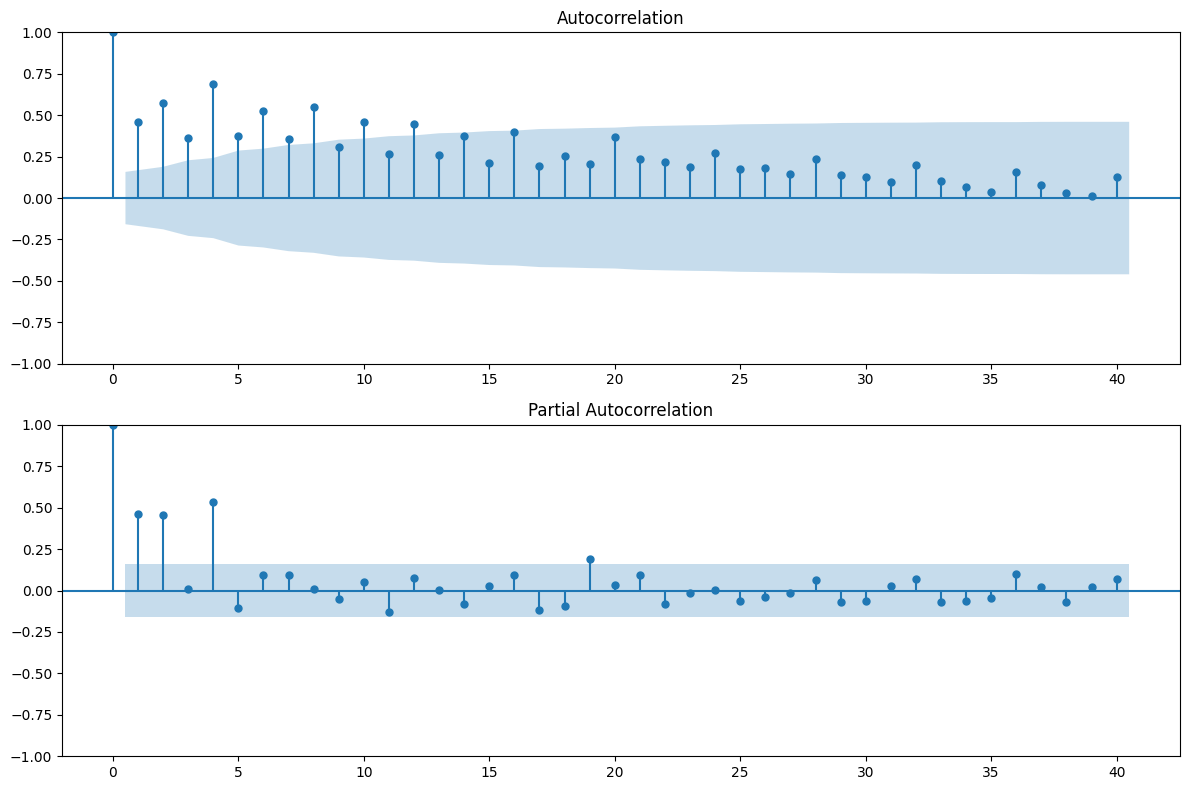

In [ ]:
# Plot ACF and PACF for 'OperatingCashFlow'
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot the Autocorrelation Function (ACF)
plot_acf(data['OperatingCashFlow'], lags=40, ax=ax1)

# Plot the Partial Autocorrelation Function (PACF)
plot_pacf(data['OperatingCashFlow'], lags=40, ax=ax2)

# Display the plots
plt.tight_layout()
plt.show()


In [ ]:
# ARIMA is a common choice, but you might also explore SARIMA, SARIMAX, LSTM, or Prophet
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
# Fit ARIMA model. Note: You'll need to choose the order (p, d, q) based on ACF and PACF plots or grid search
model_op = ARIMA(train_op, order=(1,1,1))
results_op = model_op.fit()

model_free = ARIMA(train_free, order=(1,1,1))
results_free = model_free.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  

In [ ]:
# Predict the next 4 quarters
predictions_op = results_op.forecast(steps=4)
predictions_free = results_free.forecast(steps=4)

In [ ]:
# To revert differencing, add the predictions to the last known value
last_value_op = data['OperatingCashFlow'].iloc[-5]
predictions_op_cumsum = predictions_op.cumsum()
predicted_op = predictions_op_cumsum + last_value_op

last_value_free = data['FreeCashFlow'].iloc[-5]
predictions_free_cumsum = predictions_free.cumsum()
predicted_free = predictions_free_cumsum + last_value_free

In [ ]:
# Evaluate the model using RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_op = sqrt(mean_squared_error(test_op, predictions_op))
rmse_free = sqrt(mean_squared_error(test_free, predictions_free))

print(f'RMSE for Operating Cash Flow: {rmse_op}')
print(f'RMSE for Free Cash Flow: {rmse_free}')

RMSE for Operating Cash Flow: 1647283257.3912642
RMSE for Free Cash Flow: 1615451400.662893


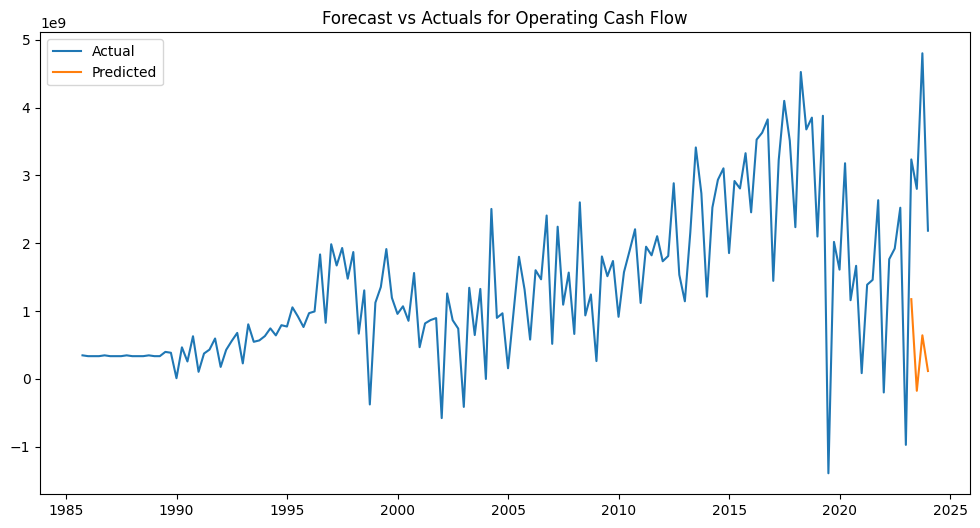

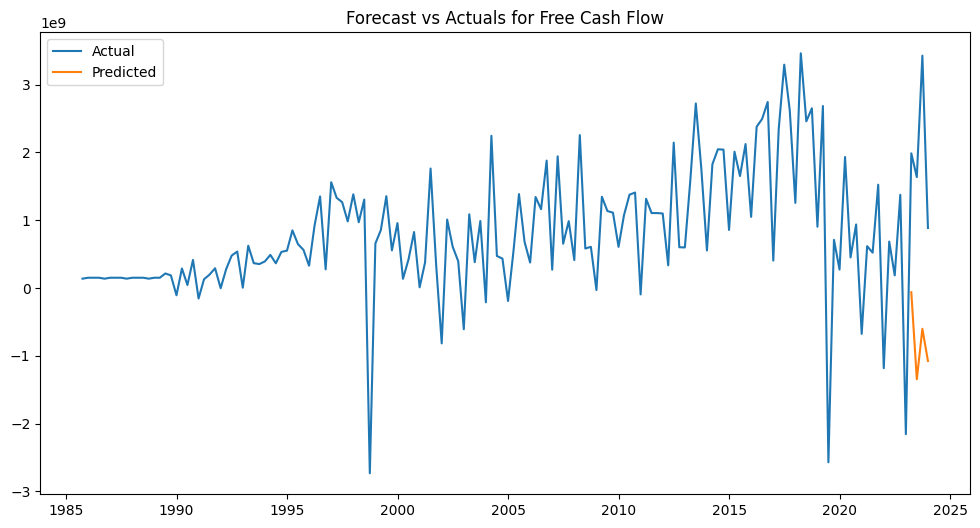

In [ ]:
# Plot the actual vs. predicted values
plt.figure(figsize=(12,6))
plt.plot(data['OperatingCashFlow'], label='Actual')
plt.plot(predicted_op, label='Predicted')
plt.legend()
plt.title('Forecast vs Actuals for Operating Cash Flow')
plt.show()

plt.figure(figsize=(12,6))
plt.plot(data['FreeCashFlow'], label='Actual')
plt.plot(predicted_free, label='Predicted')
plt.legend()
plt.title('Forecast vs Actuals for Free Cash Flow')
plt.show()